In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [9]:
df = pd.read_csv("/content/drive/My Drive/InputDataFromBaxter/lists.csv")

In [17]:
df = df.drop('Unnamed: 0', axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarni

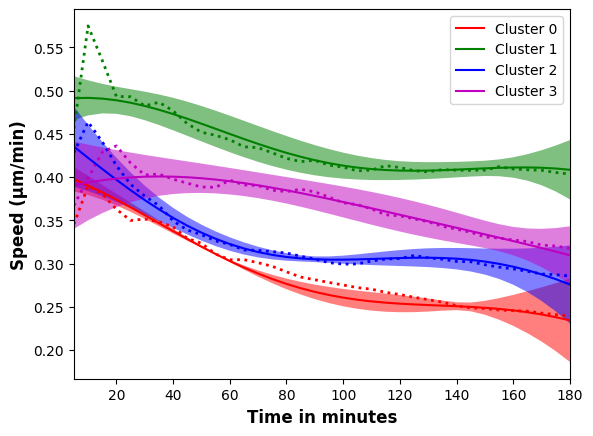

In [24]:
num_frames = 36
x = np.atleast_2d(range(5,(num_frames+1)*5,5)).T
dy0 = 0.1  * np.random.random(np.array(df.y0_spd).shape)
dy1 = 0.1 * np.random.random(np.array(df.y1_spd).shape)
dy2 = 0.1  * np.random.random(np.array(df.y2_spd).shape)
dy3 = 0.1  *np.random.random(np.array(df.y3_spd).shape)

# Instantiate a Gaussian Process model -- Kernel parameters are estimated using maximum likelihood principle.
kernel = C(1.0, (1e-3, 1e3)) * RBF(36, (1e-2, 1e2))
gp0 = GaussianProcessRegressor(kernel=kernel, alpha=dy0 ** 2,
                              n_restarts_optimizer=10)
gp1 = GaussianProcessRegressor(kernel=kernel, alpha=dy1 ** 2,
                              n_restarts_optimizer=10)
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=dy2 ** 2,
                              n_restarts_optimizer=10)
gp3 = GaussianProcessRegressor(kernel=kernel, alpha=dy3 ** 2,
                              n_restarts_optimizer=10)

xx = np.atleast_2d(range(5,(num_frames+1)*5,5)).T#np.atleast_2d(np.linspace(1, 36, 36)).T
# Fit to data using Maximum Likelihood Estimation of the parameters
gp0.fit(x,df.y0_spd)
gp1.fit(x,df.y1_spd)
gp2.fit(x,df.y2_spd)
gp3.fit(x,df.y3_spd)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred0, sigma0 = gp0.predict(xx, return_std=True)
y_pred1, sigma1 = gp1.predict(xx, return_std=True)
y_pred2, sigma2 = gp2.predict(xx, return_std=True)
y_pred3, sigma3 = gp3.predict(xx, return_std=True)

plt.figure()
plt.plot(xx, df.y0_spd, 'r:', linewidth=2)
plt.plot(xx, df.y1_spd, 'g:', linewidth=2)
plt.plot(xx, df.y2_spd, 'b:', linewidth=2)
plt.plot(xx, df.y3_spd, 'm:', linewidth=2)

plt.plot(xx, y_pred0, 'r-',label='Cluster 0')
plt.plot(xx, y_pred1, 'g-',label='Cluster 1')
plt.plot(xx, y_pred2, 'b-',label='Cluster 2')
plt.plot(xx, y_pred3, 'm-',label='Cluster 3')

#95% confidence interval.
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred0 - 1.9600 * sigma0,
                        (y_pred0 + 1.9600 * sigma0)[::-1]]),
         alpha=.5, fc='r', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma1,
                        (y_pred1 + 1.9600 * sigma1)[::-1]]),
         alpha=.5, fc='g', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred2 - 1.9600 * sigma2,
                        (y_pred2 + 1.9600 * sigma2)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred3 - 1.9600 * sigma3,
                        (y_pred3 + 1.9600 * sigma3)[::-1]]),
         alpha=.5, fc='m', ec='None')
plt.xlabel('Time in minutes',fontweight="bold",fontsize="12")
plt.ylabel('Speed (µm/min)',fontweight="bold",fontsize="12")
#plt.title('Clusterwise comparision of Cell Speed',fontweight="bold",fontSize="14",fontname="Times New Roman")
plt.axis('tight')
plt.xlim(5,180)
#plt.ylim(0.25,0.5)
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


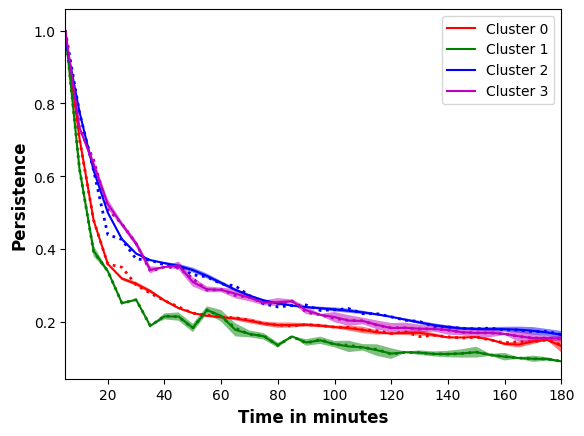

In [26]:
x = np.atleast_2d(range(5,(num_frames+1)*5,5)).T
dy0 = 0.01  * np.random.random(np.array(df.y0_per).shape)
dy1 = 0.01  * np.random.random(np.array(df.y1_per).shape)
dy2 = 0.01  * np.random.random(np.array(df.y2_per).shape)
dy3 = 0.01  * np.random.random(np.array(df.y3_per).shape)

# Instantiate a Gaussian Process model -- Kernel parameters are estimated using maximum likelihood principle.
kernel = C(1.0, (1e-3, 1e3)) * RBF(36, (1e-2, 1e2))
gp0 = GaussianProcessRegressor(kernel=kernel, alpha=dy0 ** 2,
                              n_restarts_optimizer=10)
gp1 = GaussianProcessRegressor(kernel=kernel, alpha=dy1 ** 2,
                              n_restarts_optimizer=10)
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=dy2 ** 2,
                              n_restarts_optimizer=10)
gp3 = GaussianProcessRegressor(kernel=kernel, alpha=dy3 ** 2,
                              n_restarts_optimizer=10)

xx =  np.atleast_2d(range(5,(num_frames+1)*5,5)).T
# Fit to data using Maximum Likelihood Estimation of the parameters
gp0.fit(x,df.y0_per)
gp1.fit(x,df.y1_per)
gp2.fit(x,df.y2_per)
gp3.fit(x,df.y3_per)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred0, sigma0 = gp0.predict(xx, return_std=True)
y_pred1, sigma1 = gp1.predict(xx, return_std=True)
y_pred2, sigma2 = gp2.predict(xx, return_std=True)
y_pred3, sigma3 = gp3.predict(xx, return_std=True)


plt.figure()
plt.plot(xx, df.y0_per, 'r:', linewidth=2)
plt.plot(xx, df.y1_per, 'g:', linewidth=2)
plt.plot(xx, df.y2_per, 'b:', linewidth=2)
plt.plot(xx, df.y3_per, 'm:', linewidth=2)

#plt.plot(x, y3_spd, 'r.', markersize=10, label='Observations')
plt.plot(xx, y_pred0, 'r-',label='Cluster 0')
plt.plot(xx, y_pred1, 'g-',label='Cluster 1')
plt.plot(xx, y_pred2, 'b-',label='Cluster 2')
plt.plot(xx, y_pred3, 'm-',label='Cluster 3')

#95% confidence interval.
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred0 - 1.9600 * sigma0,
                        (y_pred0 + 1.9600 * sigma0)[::-1]]),
         alpha=.5, fc='r', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma1,
                        (y_pred1 + 1.9600 * sigma1)[::-1]]),
         alpha=.5, fc='g', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred2 - 1.9600 * sigma2,
                        (y_pred2 + 1.9600 * sigma2)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred3 - 1.9600 * sigma3,
                        (y_pred3 + 1.9600 * sigma3)[::-1]]),
         alpha=.5, fc='m', ec='None')
plt.xlabel('Time in minutes',fontweight="bold",fontsize="12")
plt.ylabel('Persistence',fontweight="bold",fontsize="12")
#plt.title('Clusterwise comparision of Cell Persistence',fontweight="bold",fontsize="14",fontname="Times New Roman")
plt.axis('tight')
plt.xlim(5,180) # between 12-24 frames i.e., 60 min-120 min == 1hr-2hr
#plt.ylim(0.1,0.35)
plt.legend()